In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from venn import venn
import copy
import random
%matplotlib inline
import seaborn as sns
from pylab import *
from matplotlib.colors import colorConverter

import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
palette.extend(['salmon', 'teal','yellowgreen'])

In [2]:
df_cell_counts = pd.read_csv('cell_counts.tab', sep='\t')

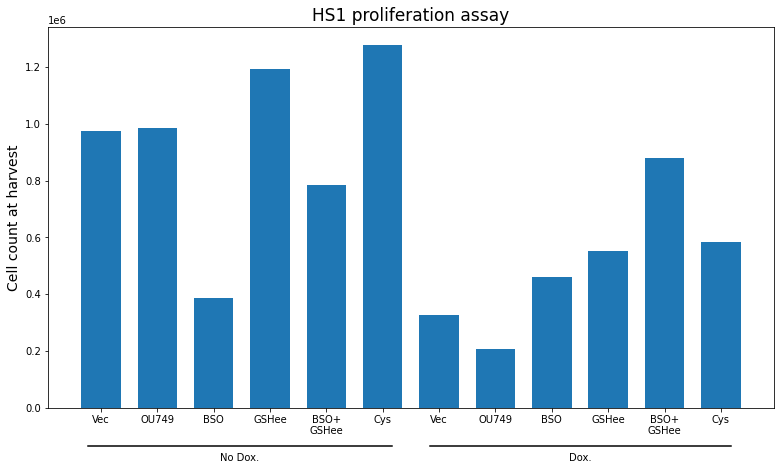

In [3]:
#labels = df_cell_counts['Sample'].values
labels = ['Vec', 'OU749', 'BSO', 'GSHee', 'BSO+\nGSHee', 'Cys', 'Vec', 'OU749', 'BSO', 'GSHee', 'BSO+\nGSHee', 'Cys']

ind = np.arange(len(labels))
width = 0.7

fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1,1,1)
ax.bar(ind, df_cell_counts['Cell count'].values, width)

plt.title('HS1 proliferation assay', size=17)
plt.ylabel('Cell count at harvest', size=14)
plt.xticks(ind, labels)
plt.xticks(rotation=0)



### Group samples according to w/wo dox. ###
N = len(labels)
offset = 0.044
s = (1-2*offset)/N
s0 = offset + s/2 - 0.7*s/2
s1 = s*6 +offset - 0.7*s/2
mid = (s0+s1)/2

yl = -0.1

ax.text(mid, yl-0.04, 'No Dox.', ha='center', transform=ax.transAxes)
line = plt.Line2D([s0, s1], [yl, yl], transform=ax.transAxes, color='black')
line.set_clip_on(False)
ax.add_line(line)


s0 = s*6 +offset + 0.7*s/2
s1 = s*12 +offset - 0.4*s/2
mid = (s0+s1)/2

ax.text(mid, yl-0.04, 'Dox.', ha='center', transform=ax.transAxes)
line = plt.Line2D([s0, s1], [yl, yl], transform=ax.transAxes, color='black')
line.set_clip_on(False)
ax.add_line(line);

plt.savefig('plots/proliferation_assay.pdf')
plt.show();

In [4]:
df_TF = pd.read_csv('TF_dipeptide_data.tab', sep='\t')
df_TF.columns = ['Compound', 'Sample', 'Area_TF']

In [5]:
df_MAV = pd.read_csv('ELMAVEN_dipeptide_data.tab', sep='\t')
df_MAV = pd.melt(df_MAV, id_vars=['Name'], value_vars=['noDox_vec', 'noDox_OU749', 'noDox_BSO', 'noDox_GSHee', 'noDox_BSO_GSHee', 'noDox_cys', 'Dox_vec', 'Dox_OU749', 'Dox_BSO', 'Dox_GSHee', 'Dox_BSO_GSHee', 'Dox_cys'])
df_MAV.columns = ['Compound', 'Sample', 'Area_MAV']

In [6]:
### Normalize to cell volume:
for sample in list(set(df_cell_counts['Sample'].values)):
    sele = df_TF['Sample'] == sample
    area_TF = df_TF[sele]['Area_TF'].values
    count = df_cell_counts[df_cell_counts['Sample'] == sample]['Volume'].values[0]
    df_TF.loc[sele, 'Area_TF'] = area_TF / count

for sample in list(set(df_cell_counts['Sample'].values)):
    sele = df_MAV['Sample'] == sample
    area_MAV = df_MAV[sele]['Area_MAV'].values
    count = df_cell_counts[df_cell_counts['Sample'] == sample]['Volume'].values[0]
    df_MAV.loc[sele, 'Area_MAV'] = area_MAV / count

In [7]:
merged_df = pd.merge(df_TF, df_MAV,  how='inner', left_on=['Compound','Sample'], right_on = ['Compound','Sample'])

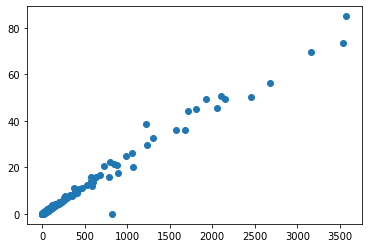

In [8]:
### Compare quantification between TraceFinder (TF) and El-MAVEN (MAV):
plt.scatter(merged_df['Area_TF'].values, merged_df['Area_MAV'].values)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


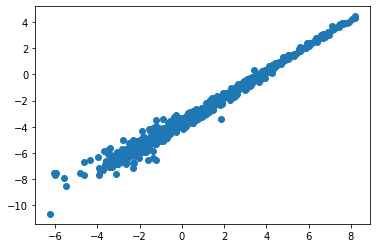

In [9]:
### Log transformed:
plt.scatter(np.log(merged_df['Area_TF'].values), np.log(merged_df['Area_MAV'].values))

In [10]:
### Extract number of 13C and add to dataset ###

carbon_isotopes = []
compound_names = []
for cn in df_TF['Compound'].values:
    s = cn.split()
    compound_names.append(s[0])
    if len(s) == 1:
        carbon_isotopes.append(0)
    else:
        N = int(s[1].split('C')[1])
        carbon_isotopes.append(N)

In [11]:
df_TF['Compound_name'] = compound_names
df_TF['C_isotope'] = carbon_isotopes

In [12]:
df_TF

,Compound,Sample,Area_TF,Compound_name,C_isotope
0,Gln,noDox_vec,1.621932,Gln,0
1,Gln,noDox_OU749,2.664500,Gln,0
2,Gln,noDox_BSO,3.784204,Gln,0
3,Gln,noDox_GSHee,292.831404,Gln,0
4,Gln,noDox_BSO_GSHee,784.547390,Gln,0
...,...,...,...,...,...
931,NADPH,Dox_OU749,0.004050,NADPH,0
932,NADPH,Dox_BSO,0.372398,NADPH,0
933,NADPH,Dox_GSHee,0.014342,NADPH,0
934,NADPH,Dox_BSO_GSHee,0.201848,NADPH,0


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


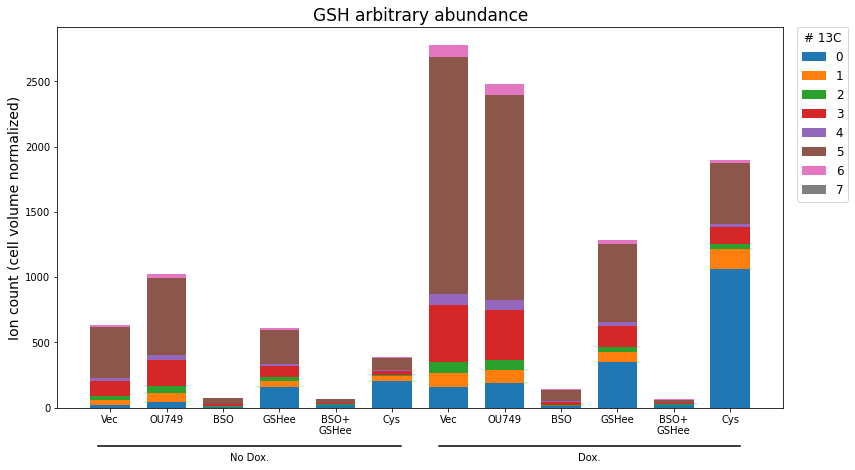

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


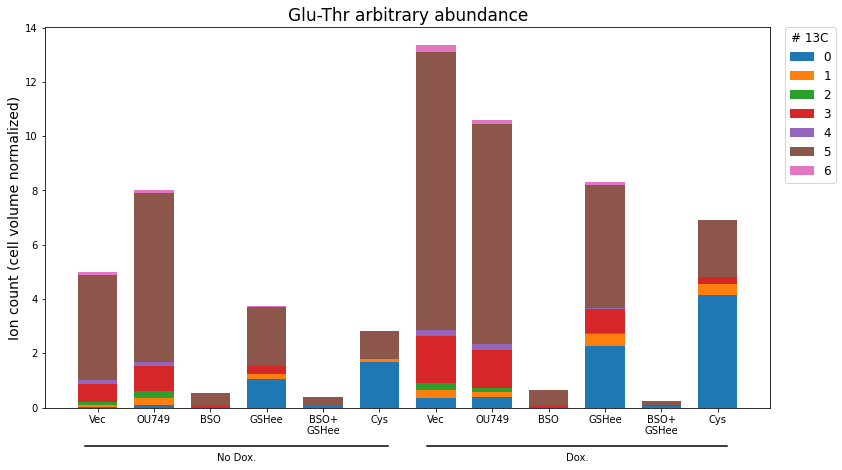

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


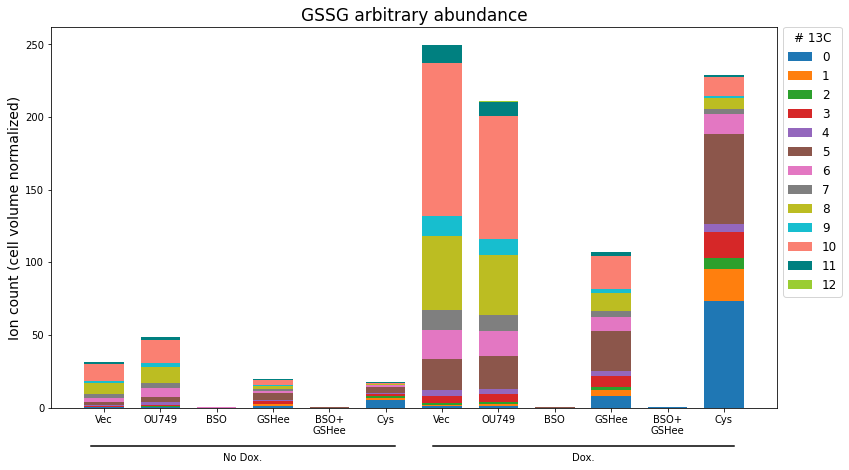

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


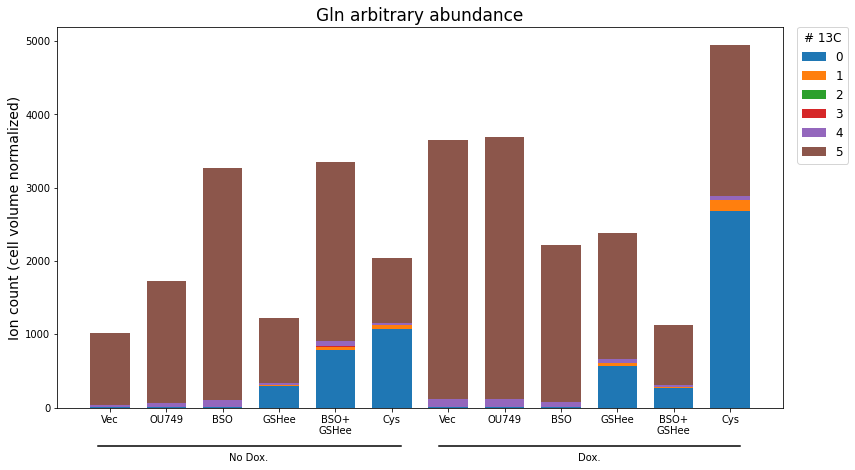

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


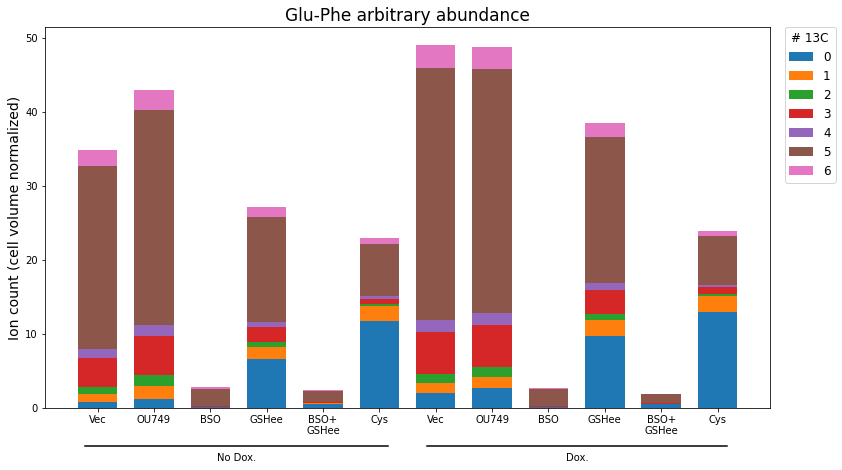

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


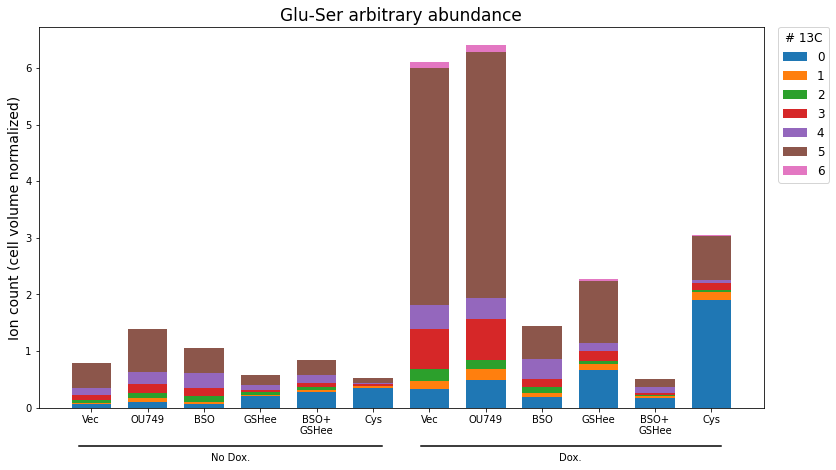

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


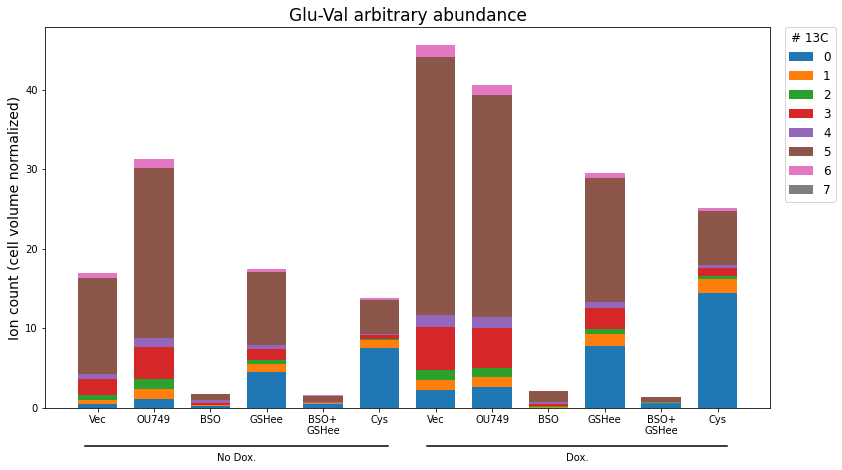

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


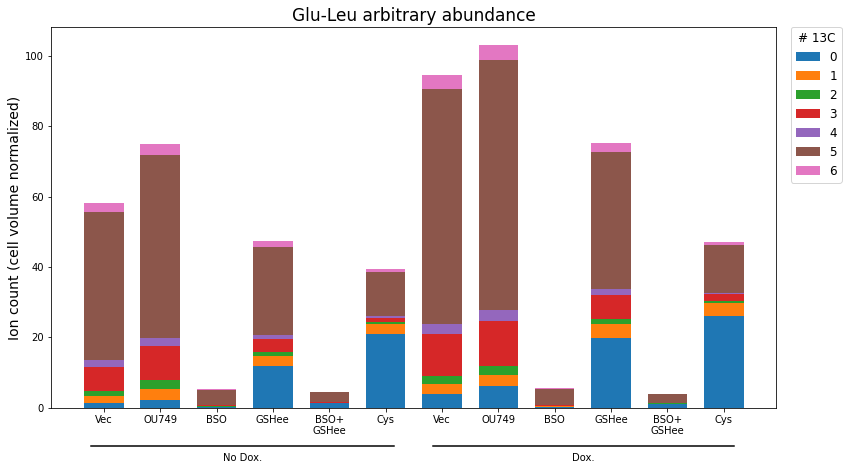

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


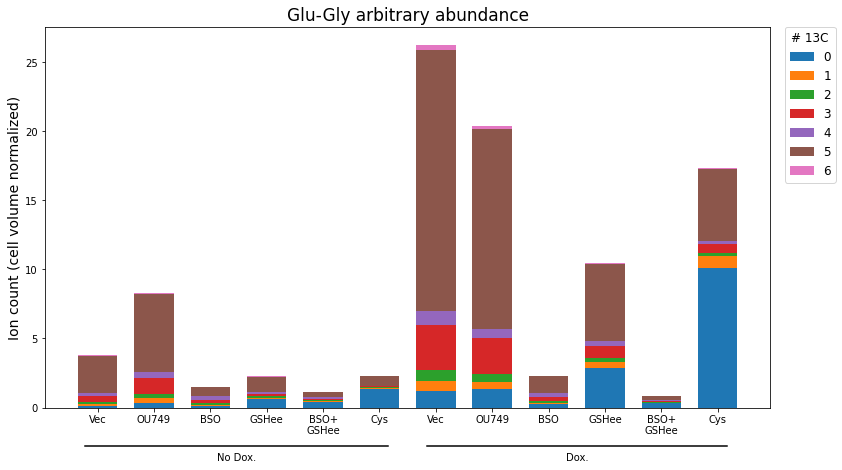

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


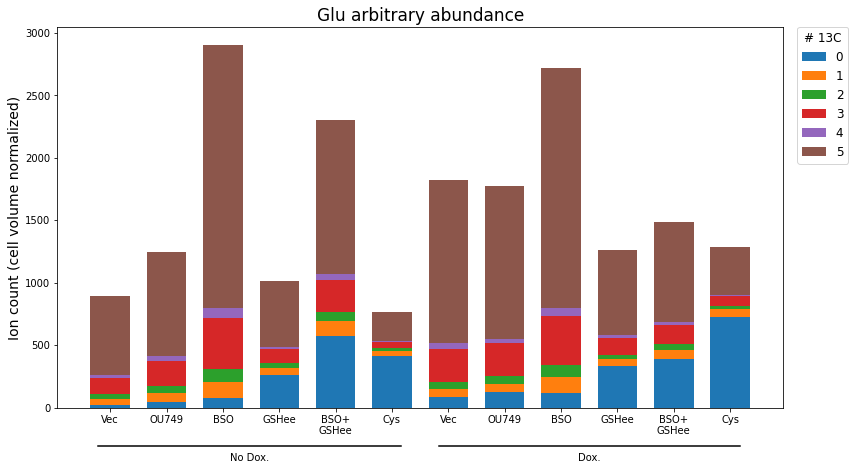

In [13]:
### Plot the dipeptide abundances ###

# Store the sum of the isotope areas:
sele1 = df_TF['C_isotope'] == 0
sele2 = df_TF['Compound'].isin([compound_name for compound_name in list(set(compound_names)) if compound_name not in ['NADP+', 'NADPH']])
df_TF_isotope_sum = df_TF[sele1&sele2]

#labels = ['noDox_vec', 'noDox_OU749', 'noDox_BSO', 'noDox_GSHee', 'noDox_BSO_GSHee', 'noDox_cys', 'Dox_vec', 'Dox_OU749', 'Dox_BSO', 'Dox_GSHee', 'Dox_BSO_GSHee', 'Dox_cys']
labels = ['Vec', 'OU749', 'BSO', 'GSHee', 'BSO+\nGSHee', 'Cys', 'Vec', 'OU749', 'BSO', 'GSHee', 'BSO+\nGSHee', 'Cys']

N = len(labels)
width = 0.7           # the width of the bars: can also be len(x) sequence
ind = np.arange(N)    # the x locations for the groups


for compound_name in list(set(compound_names)):
    if compound_name in ['NADP+', 'NADPH']:
        continue
    fig = plt.figure(figsize=(13,7))
    ax = fig.add_subplot(1,1,1)
    plot_objs = []
    C_list = []
    area_sum = np.zeros(N)
    cp_df = df_TF[df_TF['Compound_name'] == compound_name]
    for i, C in enumerate(list(set(cp_df['C_isotope'].values))):
        C_list.append(C)
        area_C = cp_df[cp_df['C_isotope'] == C]['Area_TF'].values
        p = ax.bar(ind, area_C, width, bottom=area_sum, color=palette[i])
        plot_objs.append(p)
        area_sum += area_C

    df_TF_isotope_sum.loc[df_TF_isotope_sum['Compound_name'] == compound_name, 'Area_TF'] = area_sum

    plt.title('{} arbitrary abundance'.format(compound_name), size=17)
    plt.ylabel('Ion count (cell volume normalized)', size=14)
    plt.ylim([0, max(area_sum)*1.05])
    plt.xticks(ind, labels)
    plt.xticks(rotation=0)
    plt.legend([p[1] for p in plot_objs], list(map(str,C_list)), bbox_to_anchor=(1.09, 1), borderaxespad=0, fontsize=12, title='# 13C', title_fontsize=12)

    offset = 0.044
    s = (1-2*offset)/N
    s0 = offset + s/2 - 0.7*s/2
    s1 = s*6 +offset - 0.7*s/2
    mid = (s0+s1)/2

    yl = -0.1

    ax.text(mid, yl-0.04, 'No Dox.', ha='center', transform=ax.transAxes)
    line = plt.Line2D([s0, s1], [yl, yl], transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)


    s0 = s*6 +offset + 0.7*s/2
    s1 = s*12 +offset - 0.4*s/2
    mid = (s0+s1)/2

    ax.text(mid, yl-0.04, 'Dox.', ha='center', transform=ax.transAxes)
    line = plt.Line2D([s0, s1], [yl, yl], transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line);
    
    plt.savefig('plots/dipeptide_abuncance/{}_abundance.pdf'.format(compound_name))
    plt.show();

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


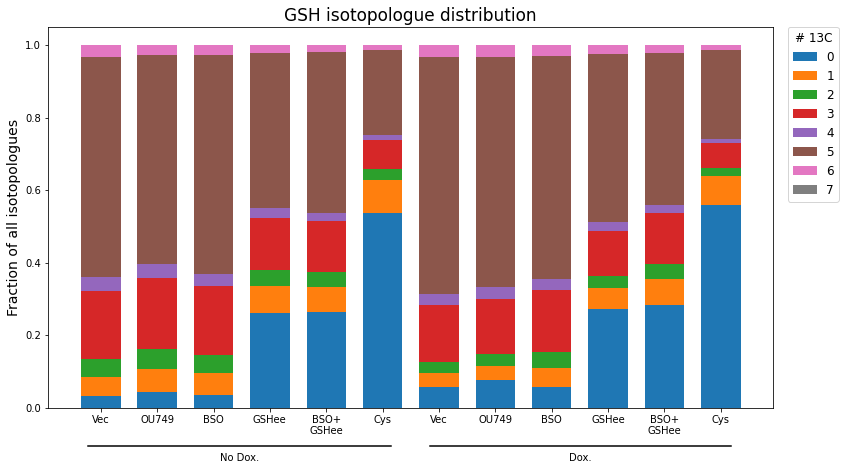

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


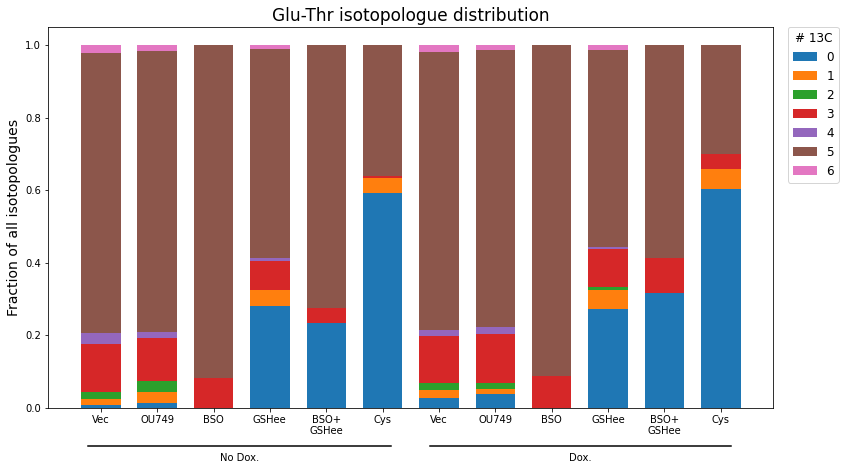

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


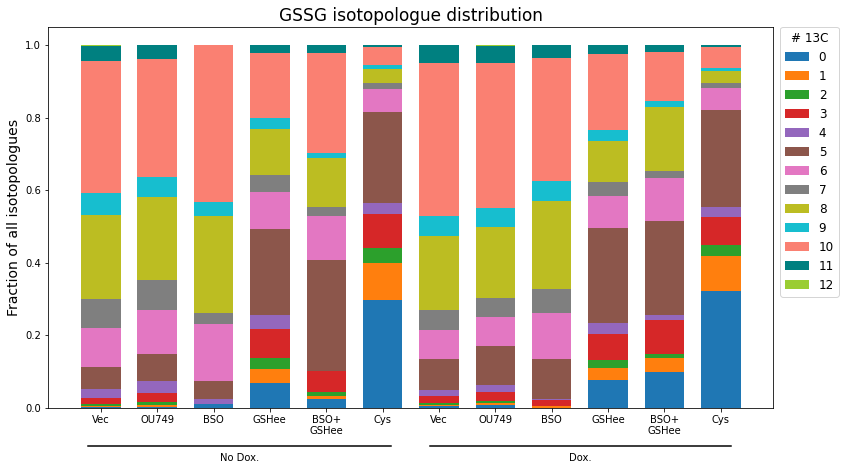

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


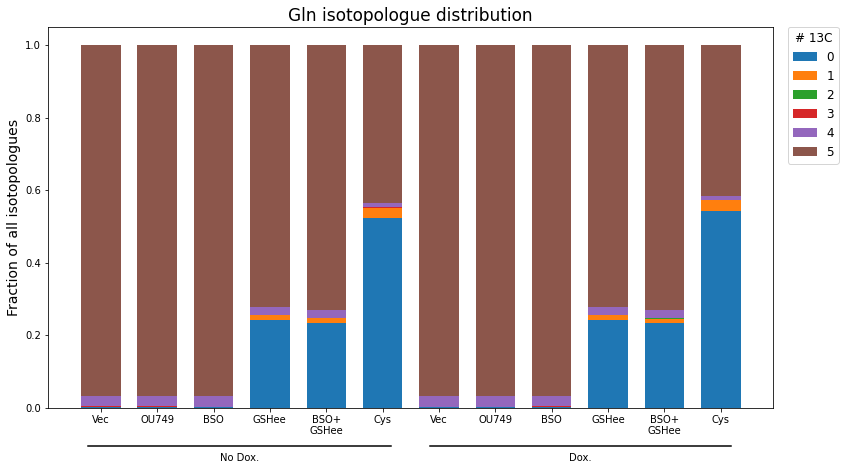

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


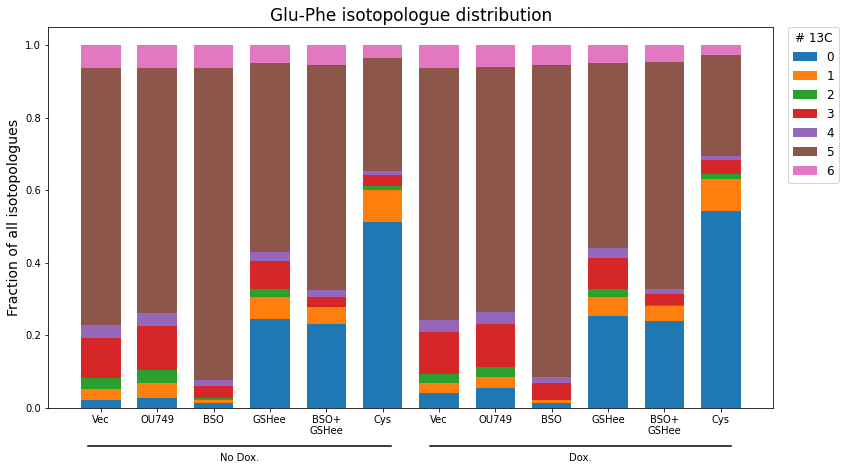

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


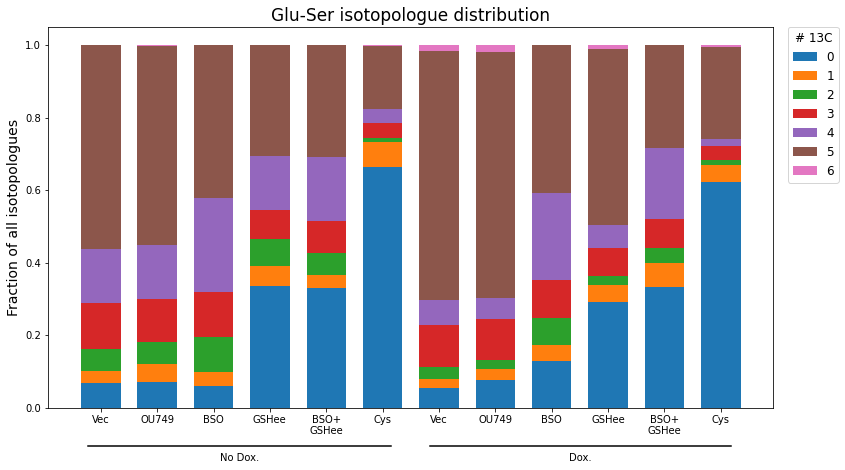

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


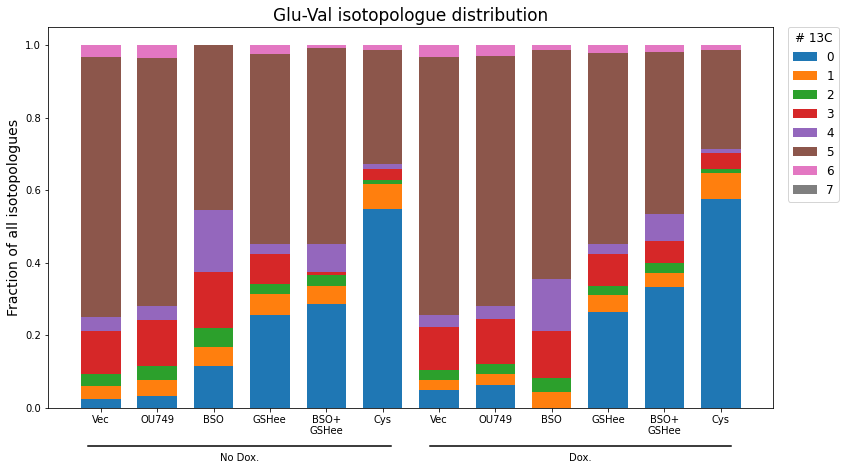

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


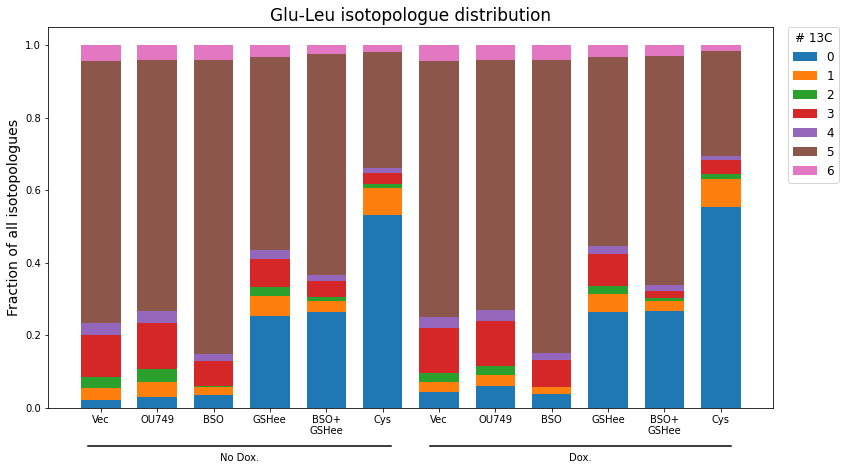

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


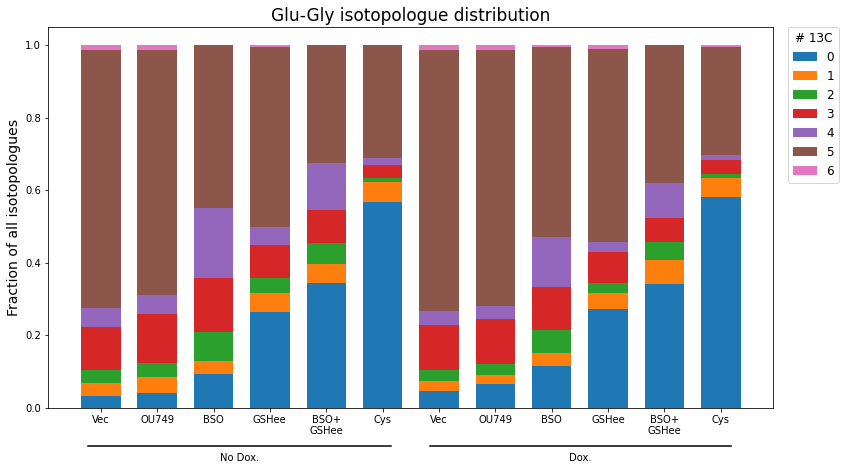

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


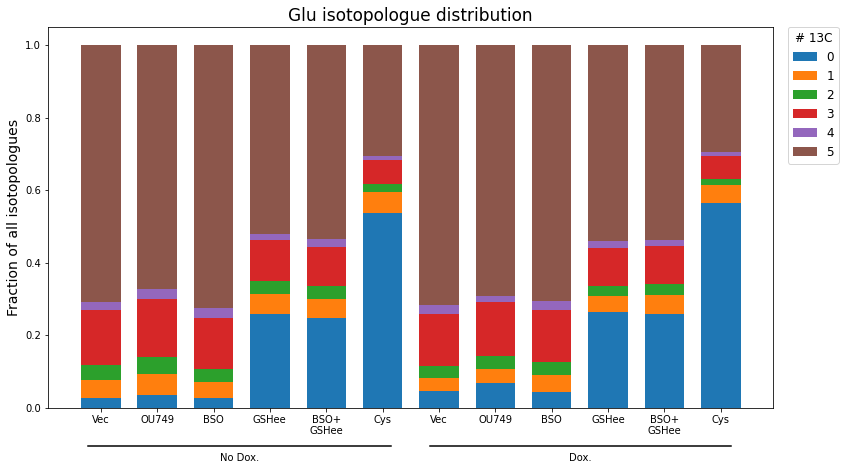

In [14]:
### Plot the dipeptide isotopologue distribution ###

#labels = ['noDox_vec', 'noDox_OU749', 'noDox_BSO', 'noDox_GSHee', 'noDox_BSO_GSHee', 'noDox_cys', 'Dox_vec', 'Dox_OU749', 'Dox_BSO', 'Dox_GSHee', 'Dox_BSO_GSHee', 'Dox_cys']
labels = ['Vec', 'OU749', 'BSO', 'GSHee', 'BSO+\nGSHee', 'Cys', 'Vec', 'OU749', 'BSO', 'GSHee', 'BSO+\nGSHee', 'Cys']

Nlabels = len(labels)
width = 0.7           # the width of the bars: can also be len(x) sequence
ind = np.arange(Nlabels)    # the x locations for the groups


for compound_name in list(set(compound_names)):
    if compound_name in ['NADP+', 'NADPH']:
        continue
    fig = plt.figure(figsize=(13,7))
    ax = fig.add_subplot(1,1,1)
    plot_objs = []
    C_list = []
    area_sum = np.zeros(Nlabels)
    cp_df = df_TF[df_TF['Compound_name'] == compound_name]

    for sample in list(set(cp_df['Sample'].values)):
        sele = cp_df['Sample'] == sample
        area_sample_sum = sum(cp_df.loc[sele, 'Area_TF'].values)
        cp_df.loc[sele, 'Area_TF'] = cp_df.loc[sele, 'Area_TF'].values/area_sample_sum

    for i, C in enumerate(list(set(cp_df['C_isotope'].values))):
        C_list.append(C)
        area_C = cp_df[cp_df['C_isotope'] == C]['Area_TF'].values
        p = ax.bar(ind, area_C, width, bottom=area_sum, color=palette[i])
        plot_objs.append(p)
        area_sum += area_C

    plt.title('{} isotopologue distribution'.format(compound_name), size=17)
    plt.ylabel('Fraction of all isotopologues', size=14)
    plt.ylim([0, 1.05])
    plt.xticks(ind, labels)
    plt.xticks(rotation=0)
    plt.legend([p[1] for p in plot_objs], list(map(str,C_list)), bbox_to_anchor=(1.09, 1), borderaxespad=0, fontsize=12, title='# 13C', title_fontsize=12)

    offset = 0.044
    s = (1-2*offset)/Nlabels
    s0 = offset + s/2 - 0.7*s/2
    s1 = s*6 +offset - 0.7*s/2
    mid = (s0+s1)/2

    yl = -0.1

    ax.text(mid, yl-0.04, 'No Dox.', ha='center', transform=ax.transAxes)
    line = plt.Line2D([s0, s1], [yl, yl], transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)


    s0 = s*6 +offset + 0.7*s/2
    s1 = s*12 +offset - 0.4*s/2
    mid = (s0+s1)/2

    ax.text(mid, yl-0.04, 'Dox.', ha='center', transform=ax.transAxes)
    line = plt.Line2D([s0, s1], [yl, yl], transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line);
    
    plt.savefig('plots/dipeptide_isotopologue_distribution/{}_isotopologue_distribution.pdf'.format(compound_name))
    plt.show();

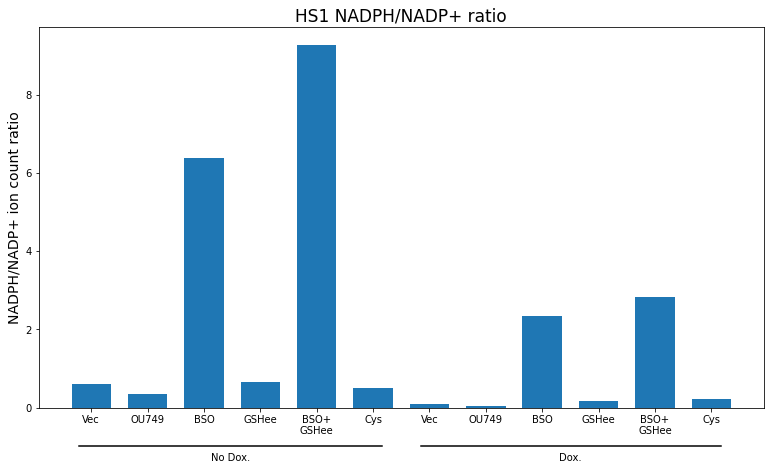

In [15]:
### Plot NADPH/NADP+ ratio ###

labels = ['Vec', 'OU749', 'BSO', 'GSHee', 'BSO+\nGSHee', 'Cys', 'Vec', 'OU749', 'BSO', 'GSHee', 'BSO+\nGSHee', 'Cys']

df_NADP = df_TF[df_TF['Compound_name'] == 'NADP+']
df_NADPH = df_TF[df_TF['Compound_name'] == 'NADPH']
df_NADPH_merge = pd.merge(df_NADPH, df_NADP,  how='inner', left_on=['Sample'], right_on = ['Sample'])
df_NADPH_merge['ratio'] = df_NADPH_merge['Area_TF_x'] / df_NADPH_merge['Area_TF_y']
ind = np.arange(len(labels))

fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1,1,1)
ax.bar(ind, df_NADPH_merge['ratio'].values, width)

plt.title('HS1 NADPH/NADP+ ratio', size=17)
plt.ylabel('NADPH/NADP+ ion count ratio', size=14)
plt.xticks(ind, labels)
plt.xticks(rotation=0);


### Group samples according to w/wo dox. ###
N = len(labels)
offset = 0.044
s = (1-2*offset)/N
s0 = offset + s/2 - 0.7*s/2
s1 = s*6 +offset - 0.7*s/2
mid = (s0+s1)/2

yl = -0.1

ax.text(mid, yl-0.04, 'No Dox.', ha='center', transform=ax.transAxes)
line = plt.Line2D([s0, s1], [yl, yl], transform=ax.transAxes, color='black')
line.set_clip_on(False)
ax.add_line(line)


s0 = s*6 +offset + 0.7*s/2
s1 = s*12 +offset - 0.4*s/2
mid = (s0+s1)/2

ax.text(mid, yl-0.04, 'Dox.', ha='center', transform=ax.transAxes)
line = plt.Line2D([s0, s1], [yl, yl], transform=ax.transAxes, color='black')
line.set_clip_on(False)
ax.add_line(line)


plt.savefig('plots/NADPH_NADP_ratio.pdf')
plt.show();

In [21]:
df_GSH = df_TF_isotope_sum[df_TF_isotope_sum['Compound_name'] == 'GSH']
df_GSSG = df_TF_isotope_sum[df_TF_isotope_sum['Compound_name'] == 'GSSG']
df_GSH_merge = pd.merge(df_GSH, df_GSSG,  how='inner', left_on=['Sample'], right_on = ['Sample'])
df_GSH_merge['ratio'] = df_GSH_merge['Area_TF_x'] / df_GSH_merge['Area_TF_y']
df_GSH_merge['sum'] = df_GSH_merge['Area_TF_x'] + 2*df_GSH_merge['Area_TF_y']
#df_GSH_merge['sum'] = df_GSH_merge['Area_TF_y']

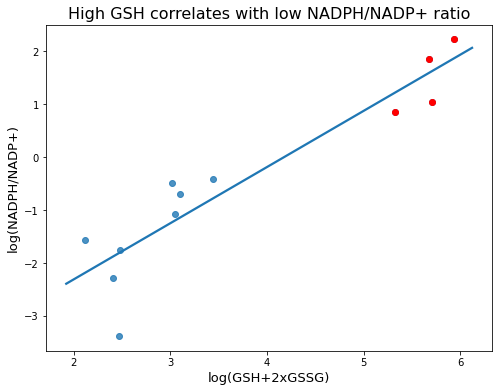

In [23]:
### Total GSH correlates with NADPH/NADP+ ratio ###

sele_BSO = ['BSO' in s for s in df_cell_counts['Sample'].values]
sele_noBSO = ['BSO' not in s for s in df_cell_counts['Sample'].values]

plt.figure(figsize=(8, 6))
p1 = sns.regplot(np.log(df_GSH_merge.loc[:,'ratio'].values), np.log(df_NADPH_merge.loc[:,'ratio'].values), ci=None)
p2 = plt.scatter(np.log(df_GSH_merge.loc[sele_BSO, 'ratio'].values), np.log(df_NADPH_merge.loc[sele_BSO, 'ratio'].values), color='red')

plt.title('High GSH correlates with low NADPH/NADP+ ratio', size=16);
plt.xlabel('log(GSH+2xGSSG)', size=13)
plt.ylabel('log(NADPH/NADP+)', size=13)


#plt.legend([p2, p1.collections[0]], ['BSO', 'Others'], fontsize=12, title='Treatment', title_fontsize=12, loc='upper right')

plt.savefig('plots/total_GSH_corr_NADPH_NADP.pdf')
plt.show();

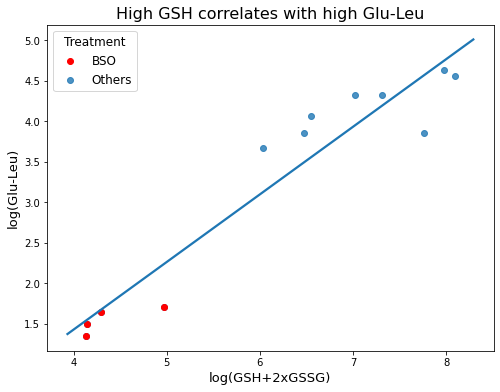

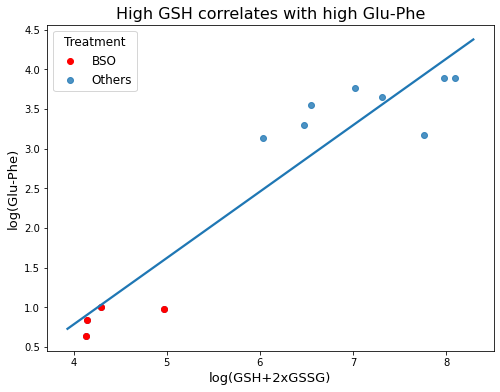

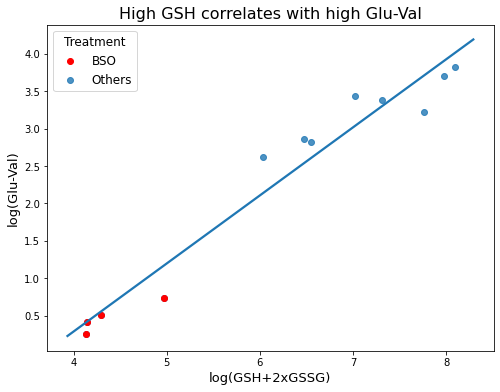

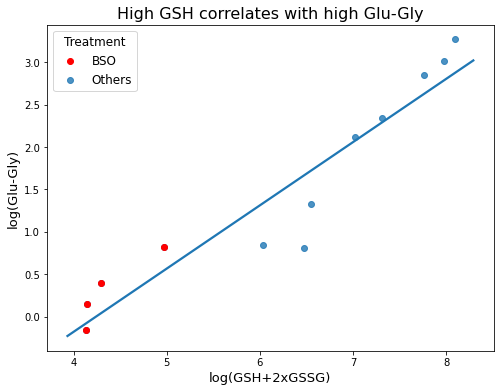

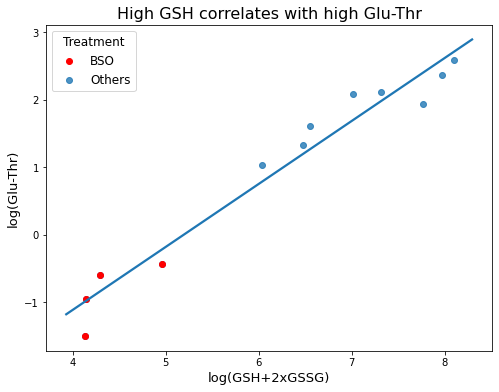

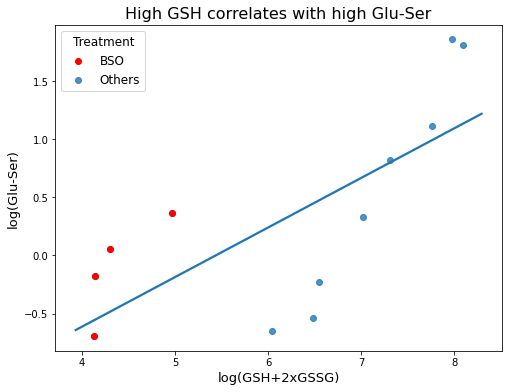

In [18]:
### Total GSH correlates with dipeptides ###

dipeptides = ['Glu-Leu', 'Glu-Phe', 'Glu-Val', 'Glu-Gly', 'Glu-Thr', 'Glu-Ser']


for dipeptide in dipeptides:
    df_dipeptide = df_TF_isotope_sum[df_TF_isotope_sum['Compound'] == dipeptide]
    sele_BSO = ['BSO' in s for s in df_dipeptide['Sample'].values]
    sele_noBSO = ['BSO' not in s for s in df_dipeptide['Sample'].values]

    plt.figure(figsize=(8, 6))
    p1 = sns.regplot(np.log(df_GSH_merge.loc[:,'sum'].values), np.log(df_dipeptide.loc[:, 'Area_TF'].values), ci=None)
    p2 = plt.scatter(np.log(df_GSH_merge.loc[sele_BSO, 'sum'].values), np.log(df_dipeptide.loc[sele_BSO, 'Area_TF'].values), color='red')

    plt.title('High GSH correlates with high {}'.format(dipeptide), size=16);
    plt.xlabel('log(GSH+2xGSSG)', size=13)
    plt.ylabel('log({})'.format(dipeptide), size=13)

    plt.legend([p2, p1.collections[0]], ['BSO', 'Others'], fontsize=12, title='Treatment', title_fontsize=12, loc='upper left')

    plt.savefig('plots/total_GSH_corr_dipeptide/total_GSH_corr_{}.pdf'.format(dipeptide))
    plt.show();

In [24]:
### NADPH/NADP+ ratio correlation with proliferation ###

sele_BSO = ['BSO' in s for s in df_cell_counts['Sample'].values]
sele_noBSO = ['BSO' not in s for s in df_cell_counts['Sample'].values]

plt.figure(figsize=(10,5))
p1 = sns.regplot(np.log(df_NADPH_merge.loc[sele_noBSO, 'ratio'].values), np.log(df_cell_counts.loc[sele_noBSO, 'Cell count'].values), ci=None)
p2 = plt.scatter(np.log(df_NADPH_merge.loc[sele_BSO, 'ratio'].values), np.log(df_cell_counts.loc[sele_BSO, 'Cell count'].values), color='red')

plt.title('NADPH/NADP+ ratio correlates with proliferation', size=16)
plt.ylabel('log(Cell count at harvest)', size=13)
plt.xlabel('log(NADPH/NADP+)', size=13)


plt.legend([p2, p1.collections[0]], ['BSO', 'Others'], fontsize=12, title='Treatment', title_fontsize=12, loc='upper left')


plt.savefig('plots/NADPH_NADP_corr_proliferation.pdf')
plt.show();

NameError: name 'sns' is not defined

<Figure size 720x360 with 0 Axes>

In [7]:
df_NADPH_old = pd.read_csv('NADPH_old.tab', sep='\t')
df_NADPH_old = df_NADPH_old.iloc[::-1]
df_NADPH_old

,Cell line,Dox,Ratio
17,H1299,No,1.134274
16,H1299,No,0.893070
15,H1299,No,1.041477
14,H1299,Yes,0.147553
13,H1299,Yes,0.069647
12,H1299,Yes,0.233143
11,HS1,No,0.176959
10,HS1,No,0.133023
9,HS1,No,0.078084
8,HS1,Yes,0.046479


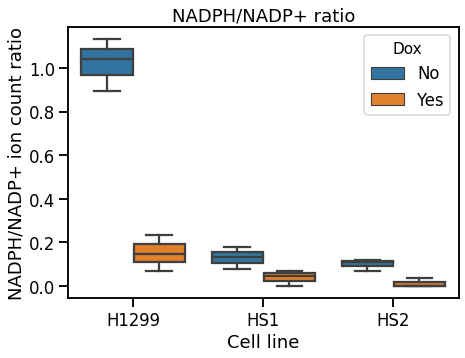

In [8]:
sns.set_context("talk")

plt.figure(figsize=(7,5))
ax = sns.boxplot(x="Cell line", y="Ratio", hue="Dox",
                 data=df_NADPH_old)

plt.title('NADPH/NADP+ ratio')
plt.ylabel('NADPH/NADP+ ion count ratio')

plt.savefig('plots/NADPH_NADP_ratio_cell_lines.pdf', bbox_inches = "tight")
plt.show();

In [12]:
df_cell_count_old = pd.read_csv('cell_counts_old.tab', sep='\t')
df_cell_count_old

,Cell line,Dox,Doublings per day
0,H1299,No,1.140513
1,HS1,No,1.041887
2,HS2,No,1.108361
3,H1299,Yes,0.953381
4,HS1,Yes,0.750314
5,HS2,Yes,0.866409


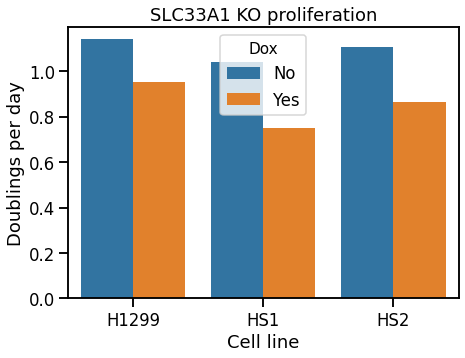

In [13]:
sns.set_context("talk")

plt.figure(figsize=(7,5))
ax = sns.barplot(x="Cell line", y="Doublings per day", hue="Dox",
                 data=df_cell_count_old)

plt.title('SLC33A1 KO proliferation')
plt.ylabel('Doublings per day')

plt.savefig('plots/proliferation_assay_old.pdf', bbox_inches = "tight")
plt.show();